/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_14623/1775176480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dl_tm'] = pd.to_datetime(filtered_data['dl_tm'])
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_14623/1775176480.py:35: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  plt.tight_layout()  # 自动调整布局避免标签重叠
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_14623/1775176480.py:35: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.tight_layout()  # 自动调整布局避免标签重叠
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_14623/1775176480.py:35: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from

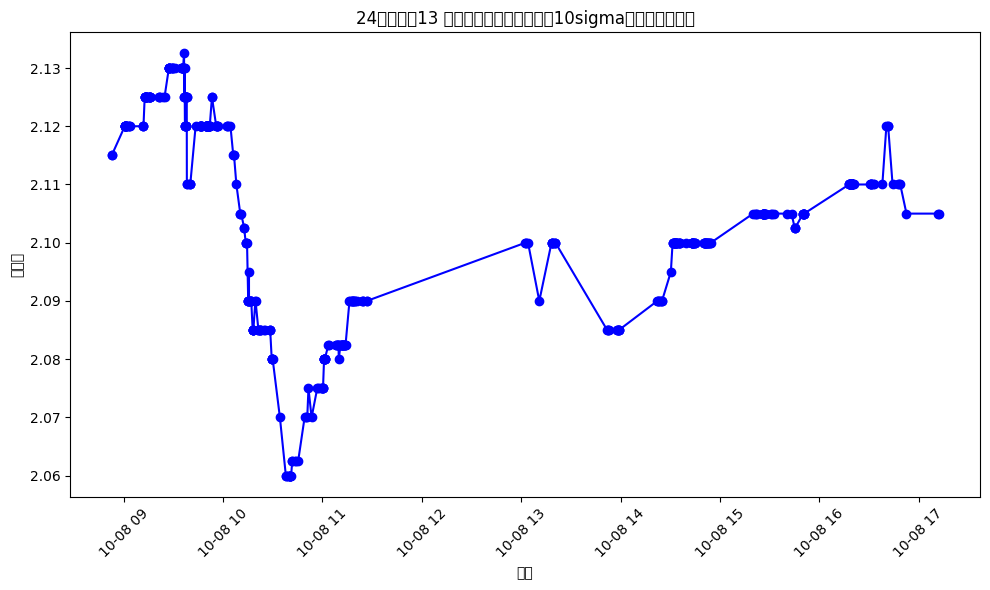

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据，假设你的数据在一个CSV文件中
data = pd.read_csv('bond_brk10_08.csv')

# 1. 过滤出特定债券的数据，比如 '24附息国债13'
filtered_data = data[data['bond_shrt_nm'] == '24附息国债13']

# 2. 将 'dl_tm' 列转换为 datetime 类型以便排序
filtered_data['dl_tm'] = pd.to_datetime(filtered_data['dl_tm'])

# 3. 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = filtered_data['dlt_prc'].mean()
std_dlt_prc = filtered_data['dlt_prc'].std()

# 4. 剔除偏离均值10个标准差之外的数据
filtered_data = filtered_data[np.abs(filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 5. 按照 'dl_tm' 列升序排序
sorted_data = filtered_data.sort_values(by='dl_tm')

# 6. 绘制时间和收益率（dlt_prc）的图表
plt.figure(figsize=(10,6))
plt.plot(sorted_data['dl_tm'], sorted_data['dlt_prc'], marker='o', linestyle='-', color='b')

# 设置标题和标签
plt.title('24附息国债13 收益率随时间变化（剔除10sigma之外的异常值）')
plt.xlabel('时间')
plt.ylabel('收益率')

# 显示图表
plt.xticks(rotation=45)  # 旋转X轴上的时间刻度，以便更好地显示
plt.tight_layout()  # 自动调整布局避免标签重叠
plt.show()
